In [5]:
import pandas as pd
from scipy.stats import shapiro, mannwhitneyu, ks_2samp, spearmanr, pearsonr
from scripts.utils import rank_biserial
import matplotlib.pyplot as plt

In [6]:
df_6hum = pd.read_csv('../../data/performance/nonsem_6hum.csv')
df_1bot_5hum = pd.read_csv('../../data/performance/nonsem_1bot_5hum.csv')
df_3bots_3hum = pd.read_csv('../../data/performance/nonsem_3bots_3hum.csv')

# Extracting TotalTrials
total_trials_6hum = df_6hum[df_6hum['isRobot'] == 0]['TotalTrials']
total_trials_1bot_5hum = df_1bot_5hum[df_1bot_5hum['isRobot'] == 0]['TotalTrials']
total_trials_3bots_3hum = df_3bots_3hum[df_3bots_3hum['isRobot'] == 0]['TotalTrials']

In [7]:
# Perform Shapiro-Wilk test for normality
shapiro_6hum = shapiro(total_trials_6hum)
shapiro_1bot_5hum = shapiro(total_trials_1bot_5hum)
shapiro_3bots_3hum = shapiro(total_trials_3bots_3hum)

print(f'Shapiro-Wilk Test for 6 humans: W={shapiro_6hum.statistic}, p-value={shapiro_6hum.pvalue}')
print(f'Shapiro-Wilk Test for 1 bot, 5 humans: W={shapiro_1bot_5hum.statistic}, p-value={shapiro_1bot_5hum.pvalue}')
print(f'Shapiro-Wilk Test for 3 bots, 3 humans: W={shapiro_3bots_3hum.statistic}, p-value={shapiro_3bots_3hum.pvalue}')

Shapiro-Wilk Test for 6 humans: W=0.9899702140100266, p-value=0.006924419229661763
Shapiro-Wilk Test for 1 bot, 5 humans: W=0.9774915082923978, p-value=0.07344912021231953
Shapiro-Wilk Test for 3 bots, 3 humans: W=0.9892792362366021, p-value=0.578612422574136


### Differences in TotalTrials (Humans)

In [8]:
# Perform Mann-Whitney U test for pairwise comparisons
u_6hum_1bot_5hum = mannwhitneyu(total_trials_1bot_5hum, total_trials_6hum, alternative='greater')
u_6hum_3bots_3hum = mannwhitneyu(total_trials_3bots_3hum, total_trials_6hum, alternative='greater')
u_1bot_5hum_3bots_3hum = mannwhitneyu(total_trials_3bots_3hum, total_trials_1bot_5hum, alternative='greater')

print(f'Mann-Whitney U Test between 6 humans and 1 bot, 5 humans: U={u_6hum_1bot_5hum.statistic}, p-value={u_6hum_1bot_5hum.pvalue}')
print(f'Mann-Whitney U Test between 6 humans and 3 bots, 3 humans: U={u_6hum_3bots_3hum.statistic}, p-value={u_6hum_3bots_3hum.pvalue}')
print(f'Mann-Whitney U Test between 1 bot, 5 humans and 3 bots, 3 humans: U={u_1bot_5hum_3bots_3hum.statistic}, p-value={u_1bot_5hum_3bots_3hum.pvalue}')

Mann-Whitney U Test between 6 humans and 1 bot, 5 humans: U=24370.0, p-value=0.009601810419629115
Mann-Whitney U Test between 6 humans and 3 bots, 3 humans: U=29834.0, p-value=7.832985800858076e-11
Mann-Whitney U Test between 1 bot, 5 humans and 3 bots, 3 humans: U=6659.5, p-value=0.001972235121419238


In [9]:
# Calculate effect size (r)
r_trials_6hum_1bot_5hum = rank_biserial(total_trials_1bot_5hum, total_trials_6hum, alternative='greater')
r_trials_6hum_3bots_3hum = rank_biserial(total_trials_3bots_3hum, total_trials_6hum, alternative='greater')
r_trials_1bot_5hum_3bots_3hum =  rank_biserial(total_trials_3bots_3hum, total_trials_1bot_5hum, alternative='greater')

print("r_trials_6hum_1bot_5hum:", r_trials_6hum_1bot_5hum)
print("r_trials_6hum_3bots_3hum:", r_trials_6hum_3bots_3hum)
print("r_trials_1bot_5hum_3bots_3hum:", r_trials_1bot_5hum_3bots_3hum)

r_trials_6hum_1bot_5hum: 0.14866138763197578
r_trials_6hum_3bots_3hum: 0.4062028657616892
r_trials_1bot_5hum_3bots_3hum: 0.2314164201183433


/var/folders/wh/s927wcpj033fbq60h6qrhkyr0000gn/T/ipykernel_31841/1561751758.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([total_trials_6hum, total_trials_1bot_5hum, total_trials_3bots_3hum],


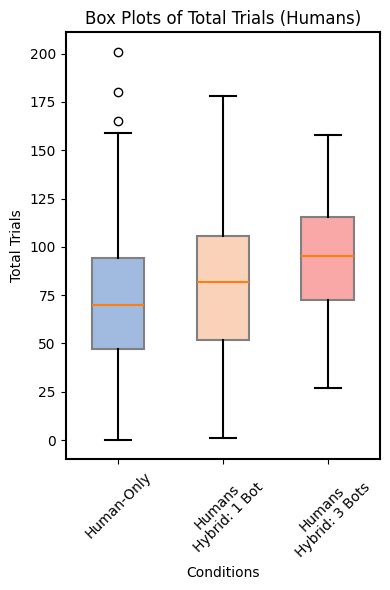

In [10]:
# Plot box plots
plt.figure(figsize=(4, 6))
box = plt.boxplot([total_trials_6hum, total_trials_1bot_5hum, total_trials_3bots_3hum], 
                  labels=['Human-Only', 'Humans\nHybrid: 1 Bot', 'Humans\nHybrid: 3 Bots'], 
                  patch_artist=True, widths=0.5)

# Rotate X labels
plt.xticks(rotation=45)

# Set background to white
plt.gca().set_facecolor('white')

# Colors for box plots
colors = ['#A1BAE0', '#F9D2B9', '#F9A7A7']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('#808080')  # Set the edge color to #808080
    patch.set_linewidth(1.5)

# Customize whiskers, caps, and fliers
for element in ['whiskers', 'caps', 'fliers']:
    plt.setp(box[element], color='black', linewidth=1.5)

# Ensure the median line is in the default color
for median in box['medians']:
    median.set_linewidth(1.5)

# Add a box around the entire figure
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

plt.ylabel('Total Trials')
plt.xlabel('Conditions')
plt.title('Box Plots of Total Trials (Humans)')
plt.tight_layout()

# Save the figure
plt.savefig('../../plots/interactions/boxplot_trials_all_hum.pdf', format='pdf')

# Show the plot
plt.show()

### Relation: Trials and Score

In [11]:
# Filter rows where isRobot is 0 and combine the DataFrames
df_6hum_filtered_on_hum = df_6hum[df_6hum['isRobot'] == 0]
df_1bot_5hum_filtered_on_hum = df_1bot_5hum[df_1bot_5hum['isRobot'] == 0]
df_3bots_3hum_filtered_on_hum = df_3bots_3hum[df_3bots_3hum['isRobot'] == 0]

# Combine the DataFrames
df_combined = pd.concat([df_6hum_filtered_on_hum, df_1bot_5hum_filtered_on_hum, df_3bots_3hum_filtered_on_hum])

In [12]:
# Check normality of 'Score'
shapiro_score = shapiro(df_combined['Score'])
print(f"Shapiro-Wilk test for score: W={shapiro_score.statistic}, p-value={shapiro_score.pvalue}")

if shapiro_score.pvalue < 0.05:
    print("The Score is not normally distributed. Apply Spearman correlation.")
    # Calculate Spearman correlation on Score
    spearman_corr, spearman_p_value = spearmanr(df_combined['TotalTrials'], df_combined['Score'])
    print(f"Spearman correlation (score): {spearman_corr} (p-value: {spearman_p_value})")
else:
    print("The Score is normally distributed. Apply Pearson correlation.")
    # Calculate Pearson correlation on Score
    pearson_corr, pearson_p_value = pearsonr(df_combined['TotalTrials'], df_combined['Score'])
    print(f"Pearson correlation (score): {pearson_corr} (p-value: {pearson_p_value})")


Shapiro-Wilk test for score: W=0.34057320787543965, p-value=3.308054032511195e-42
The Score is not normally distributed. Apply Spearman correlation.
Spearman correlation (score): 0.4849262313210709 (p-value: 1.1941351461708968e-37)


### Relation: Trials and Items Found

In [13]:
# Check normality
shapiro_items_found = shapiro(df_combined['ItemsFound'])
print(f"Shapiro-Wilk test for items found: W={shapiro_items_found.statistic}, p-value={shapiro_items_found.pvalue}")

if shapiro_items_found.pvalue < 0.05:
    print("The ItemsFound is not normally distributed. Apply Spearman correlation.")
    # Calculate Spearman correlation on ItemsFound
    spearman_corr, spearman_p_value = spearmanr(df_combined['TotalTrials'], df_combined['ItemsFound'])
    print(f"Spearman correlation (items_found): {spearman_corr} (p-value: {spearman_p_value})")
else:
    print("The ItemsFound is normally distributed. Apply Pearson correlation.")
    # Calculate Pearson correlation on  ItemsFound
    pearson_corr, pearson_p_value = pearsonr(df_combined['TotalTrials'], df_combined['ItemsFound'])
    print(f"Pearson correlation (items_found): {pearson_corr} (p-value: {pearson_p_value})")

Shapiro-Wilk test for items found: W=0.941721512903791, p-value=8.147995936705466e-15
The ItemsFound is not normally distributed. Apply Spearman correlation.
Spearman correlation (items_found): 0.4868645509557111 (p-value: 5.579329728037302e-38)
